### Bayesian classification using the normal distribution to model class conditional probabilities

#### Steps:

1. Read Data
2. Visualizaation of data
3. Sort data into classes 
4. Calculate priors
5. create PDFs for each classes
6. calculate the independent conditional probability
7. Predction usisng Given data

Note : I perform two data for  my better understanding in python; also I have done this bayesian classification in  matlab program with one data.


In [257]:
#Library
import scipy.io
import pandas as pd
from scipy.stats import norm
from numpy import mean
from numpy import std
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#### Reading data file 

In [224]:
data = scipy.io.loadmat('t017.mat') 
data2 = scipy.io.loadmat('t087.mat') 
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Fri Feb  9 13:52:02 2001',
 '__version__': '1.0',
 '__globals__': [],
 'mu': array([[1.452, 4.332, 5.544],
        [0.24 , 1.36 , 1.992]]),
 'Sigma': array([[[0.03010612, 0.22081633, 0.30458776],
         [0.00569796, 0.07310204, 0.04882449]],
 
        [[0.00569796, 0.07310204, 0.04882449],
         [0.01149388, 0.03910612, 0.07543265]]]),
 'data': array([[4. , 5.1, 3.9, 1.4, 1.6, 1.4, 1.3, 1.4, 3.3, 1.4, 4.6, 1.3, 1.5,
         5.1, 1.6, 1.7, 1.5, 5.6, 4.7, 1.6, 4.8, 5.9, 1.9, 4.5, 4. , 5. ,
         1.5, 1.4, 5.6, 1.1, 1.4, 3.5, 5.1, 4.3, 1.3, 1.5, 5.1, 3.6, 1.3,
         1.2, 4.2, 1.5, 4.4, 1.5, 4.9, 6.7, 4.5, 4.8, 1.7, 4. , 5.1, 1.3,
         6.3, 4.8, 6. , 1.7, 5. , 4.6, 6.7, 4.2, 4.4, 4.9, 5.9, 3.8, 4.9,
         4.9, 4.7, 1. , 4.7, 1.5, 1.4, 1.5, 4.5, 4.6, 4.5, 1.4, 5.4, 5.1,
         3.9, 6.4, 5.3, 4.2, 1.6, 5.8, 5.7, 5.5, 1.2, 4.5, 5.6, 1.5, 1.5,
         5.8, 3. , 5.7, 1.4, 5. , 1.9, 4.4, 3.3, 5.7, 6.9, 5.1,

### Data visualization
#### I have run matlab file and recived this attachted figure for visualization

clear all;
clc; clear all; close all; 

Data=load ('t017.mat');  % struct double 512x512


Data

Data.mu

plotclass(Data.mu, Data.Sigma);

plot(Data.data(1, :), Data.data(2, :),  '.');

<img  style='width:500px' src="figure.jpg">

### Data that have been used for 

In [172]:
d = {'data1': data['data'][0], 'data2': data['data'][1], 'class': data['classes'][0]}
df = pd.DataFrame(data=d)
df

,data1,data2,class
0,4.0,1.3,2
1,5.1,1.9,3
2,3.9,1.1,2
3,1.4,0.2,1
4,1.6,0.2,1
...,...,...,...
145,4.5,1.5,2
146,5.6,2.4,3
147,4.2,1.3,2
148,1.4,0.2,1


#### Getting MU value dataset

In [268]:
print(data1['mu'][0])
print(data1['mu'][1])

[1.452 4.332 5.544]
[0.24  1.36  1.992]


#### Getting Sigma value form dataset

In [266]:
print(data1['Sigma'][0])
print(data1['Sigma'][1])

[[0.03010612 0.22081633 0.30458776]
 [0.00569796 0.07310204 0.04882449]]
[[0.00569796 0.07310204 0.04882449]
 [0.01149388 0.03910612 0.07543265]]


In [283]:
# fit a probability distribution to a univariate data sample
def fit_distribution(data):
    # estimate parameters
#     mu=data1['mu']
    mu = mean(data)
#     sigma = data1['Sigma']
    sigma = std(data)
#     print(mu, sigma)
    # fit distribution
    dist = norm(mu, sigma)
    return dist

# Data set
X=df['data1']
X2=df['data2']

y=data1['classes'][0]

# sort data into classes for data 1
Xy1 = X[y == 1]
Xy2 = X[y == 2]
Xy3 = X[y == 3]


# sort data into classes data 2
X_2y1 = X2[y == 1]
X_2y2 = X2[y == 2]
X_2y3 = X2[y == 3]


# calculate priors
priory1 = len(Xy1) / len(X)
priory2 = len(Xy2) / len(X)
priory3 = len(Xy3) / len(X)
print('Prior: ', priory1, priory3, priory3)


# create PDFs for y==1
X1y1 = fit_distribution(Xy1)
X2y1 = fit_distribution(X_2y1)

#create PDFs for y==2
X1y2 = fit_distribution(Xy2)
X2y2 = fit_distribution(X_2y2)

# create PDFs for y==3
X1y3 = fit_distribution(Xy3)
X2y3 = fit_distribution(X_2y3)

# calculate the independent conditional probability
def probability(Xsample, prior, dist1, dist2):
    return prior * dist1.pdf(Xsample[0]) * dist2.pdf(Xsample[1])

def probmax(Xsample):
    py1 = probability(Xsample, priory1, X1y1, X2y1 )*100
    py2 = probability(Xsample, priory1, X1y2, X2y2 )*100
    py3 = probability(Xsample, priory1, X1y3, X2y3)*100
    
#     print('P(y=1): ', py1)
#     print('P(y=2): ', py2)
#     print('P(y=3): ', py3)
    
    result=0    
    if py1 > py2 and py1 > py3:
        result=1
    if py2 > py1 and py2 > py3:
        result=2
    if py3 > py1 and py3 > py2:
        result=3       
    return result


prediction=[]
test_data=[]
for i in range(len(X)): 
    test_data.append([df['data1'][i],df['data2'][i]])
    prediction.append(probmax([df['data1'][i], df['data2'][i]]))

    
print('Test Data: ',  test_data)   

Prior:  0.3333333333333333 0.3333333333333333 0.3333333333333333
Test Data:  [[4.0, 1.3], [5.1, 1.9], [3.9, 1.1], [1.4, 0.2], [1.6, 0.2], [1.4, 0.1], [1.3, 0.2], [1.4, 0.2], [3.3, 1.0], [1.4, 0.2], [4.6, 1.4], [1.3, 0.2], [1.5, 0.4], [5.1, 1.8], [1.6, 0.6], [1.7, 0.2], [1.5, 0.2], [5.6, 2.4], [4.7, 1.6], [1.6, 0.2], [4.8, 1.8], [5.9, 2.3], [1.9, 0.2], [4.5, 1.5], [4.0, 1.0], [5.0, 1.7], [1.5, 0.2], [1.4, 0.2], [5.6, 1.4], [1.1, 0.1], [1.4, 0.3], [3.5, 1.0], [5.1, 2.0], [4.3, 1.3], [1.3, 0.3], [1.5, 0.1], [5.1, 2.4], [3.6, 1.3], [1.3, 0.3], [1.2, 0.2], [4.2, 1.5], [1.5, 0.1], [4.4, 1.2], [1.5, 0.2], [4.9, 1.5], [6.7, 2.2], [4.5, 1.5], [4.8, 1.4], [1.7, 0.5], [4.0, 1.3], [5.1, 1.9], [1.3, 0.4], [6.3, 1.8], [4.8, 1.8], [6.0, 2.5], [1.7, 0.4], [5.0, 1.5], [4.6, 1.5], [6.7, 2.0], [4.2, 1.3], [4.4, 1.3], [4.9, 1.8], [5.9, 2.1], [3.8, 1.1], [4.9, 1.8], [4.9, 1.5], [4.7, 1.4], [1.0, 0.2], [4.7, 1.5], [1.5, 0.4], [1.4, 0.2], [1.5, 0.4], [4.5, 1.6], [4.6, 1.3], [4.5, 1.5], [1.4, 0.2], [5.4, 2.1]

In [285]:
print('Ture clasees: ', y)
print('Predicted Classes: ', np.array(prediction))
print('Predcition accuracy:', accuracy_score(y, prediction)*100,'%')

Ture clasees:  [2 3 2 1 1 1 1 1 2 1 2 1 1 3 1 1 1 3 2 1 2 3 1 2 2 2 1 1 3 1 1 2 3 2 1 1 3
 2 1 1 2 1 2 1 2 3 2 2 1 2 3 1 3 3 3 1 3 2 3 2 2 3 3 2 3 2 2 1 2 1 1 1 2 2
 2 1 3 3 2 3 3 2 1 3 3 3 1 2 3 1 1 3 2 3 1 3 1 2 2 3 3 3 2 3 1 1 2 1 2 3 1
 3 3 1 3 1 1 3 2 2 3 3 3 1 3 2 2 3 3 1 3 2 1 2 2 2 2 1 2 3 1 3 3 2 3 2 3 2
 1 3]
Predicted Classes:  [2 3 2 1 1 1 1 1 2 1 2 1 1 3 1 1 1 3 2 1 3 3 1 2 2 3 1 1 3 1 1 2 3 2 1 1 3
 2 1 1 2 1 2 1 2 3 2 2 1 2 3 1 3 3 3 1 2 2 3 2 2 3 3 2 3 2 2 1 2 1 1 1 2 2
 2 1 3 2 2 3 3 2 1 3 3 3 1 2 3 1 1 3 2 3 1 3 1 2 2 3 3 3 2 3 1 1 2 1 2 3 1
 3 3 1 3 1 1 3 2 2 3 3 3 1 3 3 2 3 3 1 2 2 1 2 2 2 2 1 2 3 1 3 3 2 3 2 3 2
 1 3]
Predcition accuracy: 96.0 %


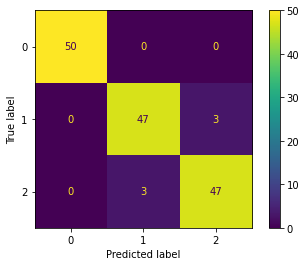

In [270]:
#confusion matrix plor for three clasess, here 0=1, 1=2, 2=3 as class
cm = confusion_matrix(y, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#### Analysis:
From confusion matrix we can see our First 'class1' has beeen predicted all rightly, Class2 has rightly predicted 47 and only missclassified 3 and finallly, class3 has rightly predicted 47 and missclassified 3.